<a href="https://colab.research.google.com/github/ahmotameni/Movie-Gross-Prediction/blob/main/Copy_of_Gross_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx
import pandas as pd
import numpy as np
import io

In [ ]:
!pwd

/content


In [5]:
from google.colab import files, drive

df = pd.read_csv('/content/data.csv')

So up to now we have downloaded and stored our initial dataset to parameter df.

In [6]:
df.isnull().sum()

Unnamed: 0        0
id                0
original_title    0
revenue           0
cast              0
firstStar         0
secondStar        0
thirdStar         0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'original_title', 'revenue', 'cast', 'firstStar',
       'secondStar', 'thirdStar'],
      dtype='object')

In [8]:
df.head()

,Unnamed: 0,id,original_title,revenue,cast,firstStar,secondStar,thirdStar
0,0,862,Toy Story,373554033.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",Tom Hanks,Tim Allen,Don Rickles
1,1,8844,Jumanji,262797249.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",Robin Williams,Jonathan Hyde,Kirsten Dunst
2,2,15602,Grumpier Old Men,0.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",Walter Matthau,Jack Lemmon,Ann-Margret
3,3,31357,Waiting to Exhale,81452156.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",Whitney Houston,Angela Bassett,Loretta Devine
4,4,11862,Father of the Bride Part II,76578911.0,"[{'cast_id': 1, 'character': 'George Banks', '...",Steve Martin,Diane Keaton,Martin Short


In [ ]:
# creating empty graph
G = nx.Graph()

# takes two parameters which are; DataFrame and graph
def createNetwork(df,G):

    # iterating DataFrame
    for movie in range(1,len(df)+1):
        
        firstStar = df.loc[movie,'firstStar']
        secondStar = df.loc[movie,'secondStar']
        thirdStar = df.loc[movie,'thirdStar']
        
        # calculating degree centrality of all nodes
        degCent = nx.degree_centrality(G)        
        
        try:
            # taking the degree centrality of the first star
            firstStarCent = degCent[df.loc[movie,'firstStar']]
    

        except:
            firstStarCent = np.nan
            firstStarBet = np.nan
            
        try:    
            # taking the degree centrality of the second star
            secondStarCent = degCent[df.loc[movie,'secondStar']]
       
        except:
            secondStarCent = np.nan
            secondStarBet = np.nan
            
        try:
            # taking the degree centrality of the third star
            thirdStarCent = degCent[df.loc[movie,'thirdStar']]
           
        except:           
            thirdStarCent = np.nan
            thirdStarBet = np.nan     
            
  
        # adding star degree centrality values to DataFrame
        df.loc[movie,"firstStarCent"] = firstStarCent

        df.loc[movie,'secondStarCent'] = secondStarCent

        df.loc[movie,"thirdStarCent"] = thirdStarCent
       
        
        # adding star nodes to network
        G.add_node(firstStar)

        G.add_node(secondStar)            

        G.add_node(thirdStar)

        # getting duo combinations of stars
        combinationsOfStars = list(combinations([firstStar,secondStar,thirdStar],2))

        # adding edge(connection) to stars which played together
        for eachCombination in combinationsOfStars:
            G.add_edge(eachCombination[0],eachCombination[1])
    
    # returning final graph and final DataFrame
    return G,df
    
finalNetwork,finalDataFrame = createNetwork(df,G)

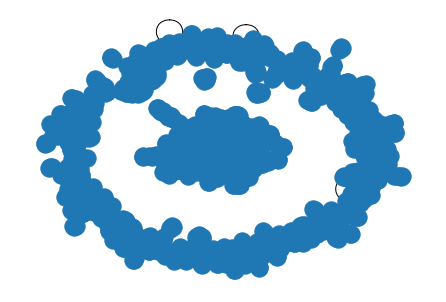

In [ ]:
nx.draw(finalNetwork)

In [ ]:
finalDataFrame

,index,Series_Title,Released_Year,Star1,Star2,Star3,Gross,firstStarCent,secondStarCent,thirdStarCent
0,0,The Shawshank Redemption,1994,Tim Robbins,Morgan Freeman,Bob Gunton,"28,341,469",NaN,NaN,NaN
1,1,The Godfather,1972,Marlon Brando,Al Pacino,James Caan,"134,966,411",NaN,NaN,NaN
2,2,The Dark Knight,2008,Christian Bale,Heath Ledger,Aaron Eckhart,"534,858,444",NaN,NaN,NaN
3,3,The Godfather: Part II,1974,Al Pacino,Robert De Niro,Robert Duvall,"57,300,000",0.250000,NaN,NaN
4,4,12 Angry Men,1957,Henry Fonda,Lee J. Cobb,Martin Balsam,"4,360,000",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
826,990,Giù la testa,1971,Rod Steiger,James Coburn,Romolo Valli,"696,690",0.001215,NaN,NaN
827,991,Kelly's Heroes,1970,Clint Eastwood,Telly Savalas,Don Rickles,"1,378,435",0.010316,NaN,0.001214
828,992,The Jungle Book,1967,Phil Harris,Sebastian Cabot,Louis Prima,"141,843,612",NaN,NaN,NaN
829,994,A Hard Day's Night,1964,John Lennon,Paul McCartney,George Harrison,"13,780,024",NaN,NaN,NaN


In [ ]:
import pprint
# calculating degree centrality of final network
degreeCentrality = nx.degree_centrality(finalNetwork)
# sorting results
sortedDict = {k: v for k, v in sorted(degreeCentrality.items(), key=lambda item: item[1])}
for eachStar in sortedDict:
    print(eachStar)
    print("-------------")

In [ ]:

# Donald O'Connor is the one of the top actors according to degree centrality
interestedStars = ["Donald O'Connor"]  

# This function returns a subgraph of the `final network` with only the `interestedStars` and their neighbors.
def getStarsAndNeighbors(finalNetwork, interestedStars):

    starsToDraw = []
    
    # Iterate over the interestedStars
    for star in interestedStars:
    
        # Append the interestedStars to nodesToDraw
        starsToDraw.append(star)
        
        # Iterate over all the neighbors of star
        for nbr in finalNetwork.neighbors(star):
        
            # Append the neighbors of star to nodesToDraw
            starsToDraw.append(nbr)
            
    return finalNetwork.subgraph(starsToDraw)

# Extract the subgraph with the interestedStars
plotSubgraph = getStarsAndNeighbors(finalNetwork, interestedStars)

# Draw the subgraph to the screen
nx.draw(plotSubgraph,with_labels=True)
plt.savefig("SubGraphOfNicolasCage.png", format="PNG")
plt.show()

In [ ]:
from scipy.stats import spearmanr
targetValues = ['Gross']
columnsWithoutTarget = [column for column in df if column not in targetValues]
dfCorrelations = {}
for targetValue in targetValues:
    for column in columnsWithoutTarget:
        rho,p_value = spearmanr(df[column],df[targetValue])
        if p_value < 0.05 :
            print("correlation coefficient is : {} and p-value is : {}".format(rho,p_value))
            print("{} has statistically significance correlation with {} : rejected null hypothesis".format(column,targetValue))
            print("\n")
            print("------------------******************------------------------")
            dfCorrelations[targetValue + " :" + column] =[rho,p_value]
        else:
            print("correlation coefficient is : {} and p-value is : {}".format(rho,p_value))
            print("{} has not statistically significance correlation with {} : not rejected null hypothesis ".format(column,targetValue))
            print("\n")
            print("------------------******************------------------------")
            dfCorrelations[targetValue +  " :" + column] =[rho,p_value]